## 分析不同类型非法域名IP和地理位置情况

In [31]:
# encoding:utf-8

In [32]:
from collections import Counter,defaultdict
import tldextract
from pymongo import MongoClient
from country_code import cn2en

In [33]:
client = MongoClient('172.29.152.152', 27017)
db = client['eds_last']
col = db['domain_ip_geo']
gam_records = col.find({'dm_type':'Gamble'})

gam_duration_records = gam_records.clone()

total_domains = gam_records.count()   # 域名总数
ip_change_count = Counter()  # 域名IP更新频率
ip_number_count = Counter()  # 域名拥有IP的数量，包括当前和之前曾经使用过的
total_ips = []     # 所有域名的IP总数，用来查看是否有域名使用相同的IP
gam_duration = []


In [34]:
gam_geo = []   # 存储原始ip_geo记录


for i in gam_records:
    gam_geo.append(i['ip_geo'])
for i in gam_geo:
    ip_change_count[len(i)] +=1
print '域名IP整体更新频率:', ip_change_count

域名IP整体更新频率: Counter({1: 5719, 2: 31, 3: 20, 4: 12})


In [35]:
for ip_geo in gam_geo:
    ip_number = 0
    for i in ip_geo:
        ip_number +=len(i['ips'])
        total_ips.append(i['ips'])
    ip_number_count[ip_number] +=1
#     if ip_number == 13:
#         print ip_geo

print ip_number_count
print len(total_ips)

Counter({1: 5565, 2: 65, 0: 31, 3: 26, 4: 24, 9: 17, 10: 15, 5: 14, 19: 7, 6: 6, 7: 4, 39: 3, 52: 3, 11: 1, 36: 1})
5889


In [36]:
def analyze_duration(gam_records):
    for i in gam_records:
        if len(i['ip_geo'])>1:
            continue
        ip_time = []    # 按照从小到大的顺序存储时间
        record_time = datetime.strptime(i['record_time'],"%Y-%m-%d %H:%M:%S")
        ip_time.append(record_time)
        
        for j in i['ip_geo']:
            ip_time.append(datetime.strptime(j['insert_time'],"%Y-%m-%d %H:%M:%S"))
                
        for d in range(0,len(ip_time)-1):
            gam_duration.append((ip_time[d+1]-ip_time[d]).seconds)
#             print (ip_time[d+1]-ip_time[d]).seconds
    
from datetime import datetime
analyze_duration(gam_duration_records)

In [37]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### IP的分布情况

(array([ 484.,  680.,  857.,  692.,  647.,  729.,  475.,  212.,  442.,  393.]),
 array([ 12611. ,  12710.8,  12810.6,  12910.4,  13010.2,  13110. ,
         13209.8,  13309.6,  13409.4,  13509.2,  13609. ]),
 <a list of 10 Patch objects>)

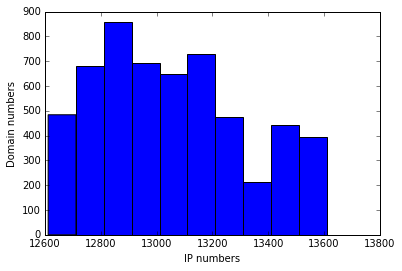

In [40]:


plt.xlabel('IP numbers')
plt.ylabel('Domain numbers')
gam_duration = np.array(gam_duration)
# plt.xticks(x,ip_counter.keys())
plt.hist(gam_duration[gam_duration>0])